In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('darkgrid')
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams['savefig.dpi'] = 750

In [2]:
x_array = np.arange(0.0, np.pi + np.pi/9.0, np.pi/9.0)
x_array_fine = np.linspace(0.0, np.pi, 1000)

In [3]:
def eval_fourier_series(x, n, a=1.0, b=np.pi/2.0):
    a_0 = a*b/np.pi
    series_sum = a_0/2.0
    for i in range(1, int(n)+1):
        factor_1 = (2.0*a*b/np.pi)
        factor_2 = (1.0 - np.cos(float(i)*b))
        factor_3 = np.cos(i*x)
        denom = ((float(i)*b)**2.0)
        series_sum += factor_1*factor_2*factor_3/denom
    return series_sum


def eval_triangle(x, a=1.0, b=np.pi/2.0):
    return np.piecewise(x,
                        [np.abs(x) <= b, np.abs(x) > b],
                        [lambda x: a*(1.0 - np.abs(x)/b), 0.0])

def fourier_coefficients(n_array, a=1.0, b=np.pi/2.0):
    a_n_array = np.empty_like(n_array)
    for i in range(0, len(n_array)):
        n = int(n_array[i])
        if n == 0:
            a_n_array[i] = a*b/np.pi
        else:
            factor_1 = (2.0*a*b/np.pi)
            factor_2 = (1.0-np.cos(float(n)*b))
            denom = ((float(n)*b)**2.0)
            a_n_array[i] = factor_1*factor_2/denom
    return a_n_array

fourier_10 = eval_fourier_series(x_array, 10)
fourier_100 = eval_fourier_series(x_array, 100)

fourier_10_fine = eval_fourier_series(x_array_fine, 10)
fourier_100_fine = eval_fourier_series(x_array_fine, 100)



triangle_coarse = eval_triangle(x_array)
triangle_fine = eval_triangle(x_array_fine)


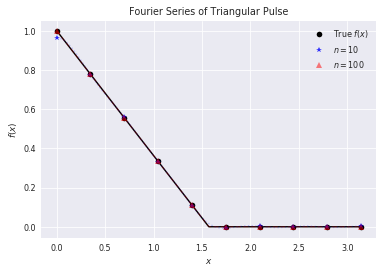

In [4]:
plt.plot(x_array, triangle_coarse, 'ok', label=r'True $f(x)$', alpha=1.0)
plt.plot(x_array_fine, triangle_fine, '-k')

plt.plot(x_array, fourier_10, '*b', label=r'$n=10$', alpha=0.8)
plt.plot(x_array_fine, fourier_10_fine, ':b', alpha=0.2)

plt.plot(x_array, fourier_100, '^r', label=r'$n=100$', alpha=0.5)
plt.plot(x_array_fine, fourier_100_fine, '--r', alpha=0.2)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Fourier Series of Triangular Pulse')
plt.legend()

In [5]:
print('For n=10:', fourier_10, '\n')
print('For n =100:', fourier_100, '\n')
print('True f(x):', triangle_coarse, '\n')
coeffs = fourier_coefficients(np.arange(0.0, 11.0, 1.0))
for i in range(0, 11):
    string_1 = 'a_' + str(i) + ' is:'
    print(string_1, coeffs[i])

For n=10: [ 0.96306627  0.77556254  0.55929625  0.33199026  0.10723908 -0.0077829
  0.00229332  0.00098353 -0.00284597  0.00346149] 

For n =100: [  9.95947490e-01   7.77741967e-01   5.55601421e-01   3.33272229e-01
   1.11248108e-01   9.65068577e-05  -2.08661319e-05   6.53113856e-06
  -1.53372504e-06   2.02500706e-07] 

True f(x): [ 1.          0.77777778  0.55555556  0.33333333  0.11111111  0.          0.
  0.          0.          0.        ] 

a_0 is: 0.5
a_1 is: 0.405284734569
a_2 is: 0.202642367285
a_3 is: 0.0450316371744
a_4 is: 0.0
a_5 is: 0.0162113893828
a_6 is: 0.0225158185872
a_7 is: 0.00827111703203
a_8 is: 0.0
a_9 is: 0.0050035152416
a_10 is: 0.00810569469139
